# Przetworzenie danych

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv('credit_risk_dataset.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [54]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Usunięcie niemożliwych przypadków**

Usunięcie z dataset'u przypadków, w których osoba ma więcej niż 113 lat (nie istniały takie osoby w historii) oraz osób, których wiek wynosił mniej niż ilość przepracowanych lat.

In [55]:
df = df[(df["person_age"]<=113) & (df["person_age"] > df["person_emp_length"])]

**Wykresy gęstości**

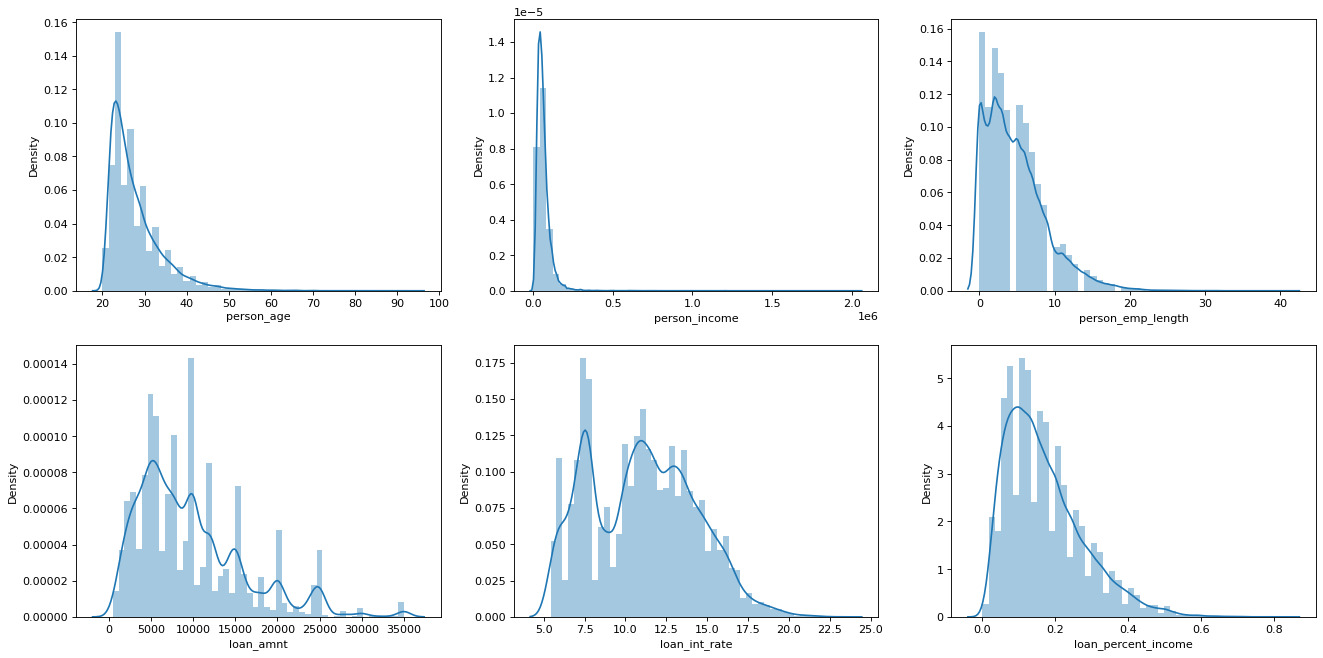

In [56]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',  'loan_percent_income']
plt.figure(figsize=(20,15), dpi= 80)
n = len(columns)
for i, column in enumerate(columns):
    plt.subplot(int(n/3 + 1), 3, i + 1 )
    sns.distplot(df[column], label=column)

**Wykresy gęstości dla danych na których użyto logarytmu**

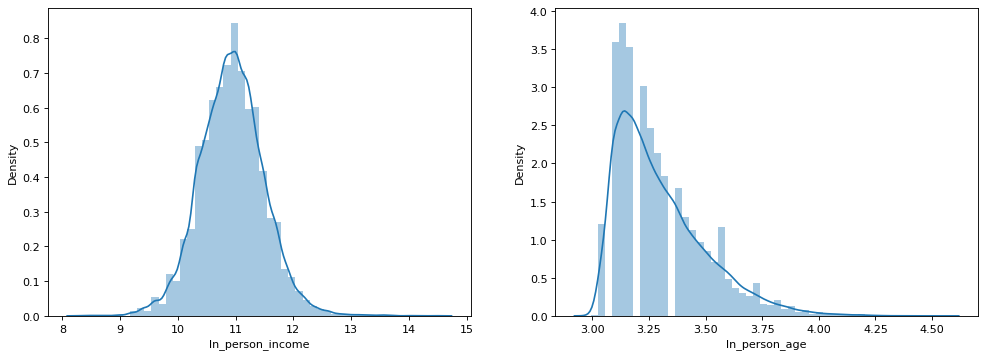

In [57]:
df['ln_person_income'] = np.log(df['person_income'])
df['ln_person_age'] = np.log(df['person_age'])

columns = ['ln_person_income', 'ln_person_age']
plt.figure(figsize=(15,5), dpi= 80)
n = len(columns)
for i, column in enumerate(columns):
    plt.subplot(1, 2, i + 1 )
    sns.distplot(df[column], label=column)

**Wykresy skrzypcowe**

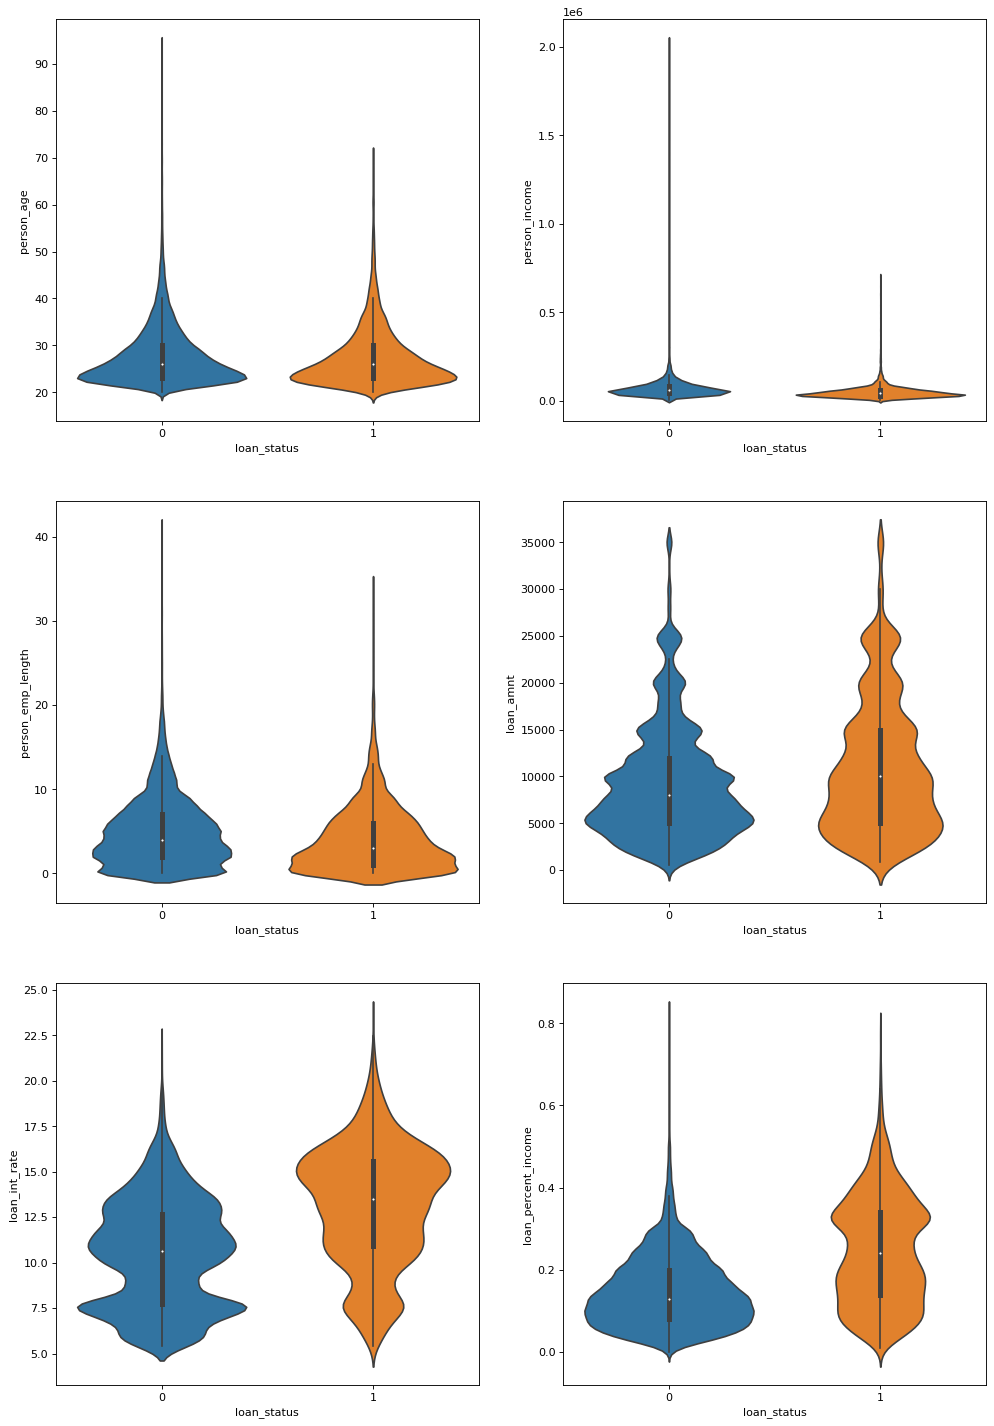

In [58]:
plt.figure(figsize=(15,30), dpi= 80)
cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',  'loan_percent_income']
n_columns = len(df[cols].columns)
for i, col in enumerate(df[cols]):
    plt.subplot(int(n_columns/2 + 1), 2, i + 1 )
    sns.violinplot(x="loan_status", y=col, data=df)

**OPIS ZBIORU DANYCH**

Jest to zbiór danych symulujący dane z biura kredytowego.
Kolejne kolumny zawierają kolejno (numeracja tak jak w zbiorze):
1. Wiek klienta

Zapisana za pomocą liczby całkowitej (integer). Najmniejsza wartość wynosi 20, a najwyższa 144. Należy wziąć to pod uwagę z dwóch powodów. Na początku należy spojrzeć na to, że trzeci kwartyl wieku wynosi 30 co oznacza, że wartość 144 będzie bardzo odstawać od reszty przypadków, co widać też na wykresie poniżej, a dodatkowo najstarsza osoba w historii zmarła w wieku 113 lat, więc każda wyższa wartość jest niezgodna z prawdą.

2. Roczny dochód klienta

Również przedstawiony w postaci liczby całkowitej. Tutaj podobnie jak w przypadku wieku klientów również znajdziemy wartości skrajne w postaci najwyższego rocznego dochodu wynoszącego 6 milionów. Patrząc na wykres możemy zauważyć, że dochód każdego z pozostałych klientów jest mniejszy niż 2 miliony, a znaczna większość (widzimy to po 3 kwartylu) ma roczny dochód nie większy od 100 tysięcy.

3. Status posiadania domu

Opisany za pomocą jednej z 4 wartości: 
* 'OWN' - klient jest w posiadaniu domu
* 'RENT' - klient wynajmuje dom
* 'MORTGAGE' - klient ma dom z hipoteką
* 'OTHER' - inny status mieszkaniowy

4. Długość zatrudnienia

Przedstawiona za pomocą liczby całkowite długość pracy klienta w latach. W tym przypadku również należy zwrócić uwagę na dwa przypadki w których długość zatrudnienia wynosi 123 lata. Co ciekawe przypadki te występują dla klientów w wieku 22 i 21 lat, co oznacza, że dane są błędne i te przypadki też należy usunąć z data setu.

5. Cel kredytu 

Opisany za pomocą jednej z 6 wartości:
* 'PERSONAL' - sprawy prywatne
* 'EDUCATION' - w celu edukacji
* 'MEDICAL' - w celach zdrowotnych
* 'VENTURE' - w celu podróży, wakacji
* 'HOMEIMPROVEMENT' - w celu remontu domu
* 'DEBTCONSOLITADION'  - w celu konsolidacji zadłużenia

6. Ocena kredytu

Opisana przy pomocy liter od 'A' (najlepsza ocena) do 'G' (najgorsza ocena). Określana jest ona na podstawie pozostałych wartości innych kolumn.

7. Wielkość kredytu

Przedstawiona za pomocą liczby całkowitej wielkość zaciągniętego kredytu przez klienta.

8. Stopa oprocentowania

Przedstawiona przy pomocy liczby zmiennoprzecinkowej (float) stopa oprocentowania.

9. Status spłaty kredytu 

Przedstawiona przy pomocy jednej z dwóch wartości: 0 lub 1. 0 oznacza wartość 'Non default' czyli brak sytuacji, w której klient zaprzestał dokonywania płatności za kredyt, natomiast 1 oznacza 'Default', czyli zatrzymanie płatności.

10. Jaką część dochodu stanowi rata kredytu

Przedstawiony w postaci liczby zmiennoprzecinkowej z zakresu 0 do 1 stosunek opłat za raty kredytu do dochodu klienta.

11. Historia spłat kredytów

Przedstawiona w postaci dwóch zmiennych 'Y' oraz 'N' informacja o tym czy w przeszłości wystąpiła sytuacja z zaprzestaniem płatności klienta rat kredytu. 'Y' oznacza 'tak', 'N' - nie.

12. Długość historii kredytowej klienta

Przedstawiony za pomocą liczby całkowitej okres (w latach) historii kredytowej klienta. 

**Wykresy kolumnowe**

[93.07053941908714, 87.54774637127578, 68.92110502737681, 69.1588785046729]
['OWN' 'MORTGAGE' 'RENT' 'OTHER']


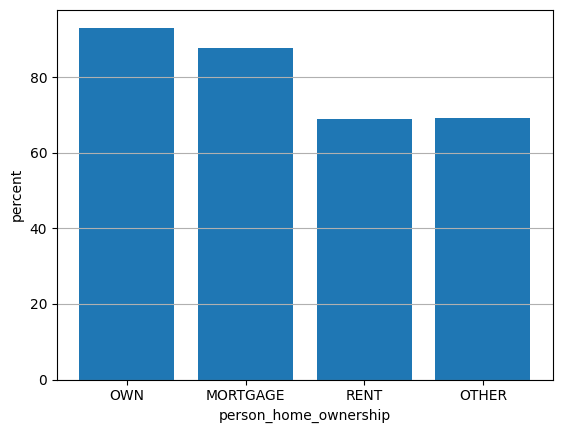

In [59]:
repayed_percent_home_ownership = []
for person_home_ownership in df['person_home_ownership'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['person_home_ownership'] == person_home_ownership)]) / len(df[df['person_home_ownership'] == person_home_ownership]) * 100
    repayed_percent_home_ownership.append(x)

print(repayed_percent_home_ownership)
print(df['person_home_ownership'].unique())


plt.bar(df['person_home_ownership'].unique(), repayed_percent_home_ownership)
plt.xlabel('person_home_ownership')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

Wykres przedstawia procentowy udział, osób które spłaciły kredyt (LOAN_STATUS == 0) w zależności od rodzaju zamieszkania.
Jak widać kredyty były spłacane najczęściej wśród osób które posiadają nieruchomość (OWN) - 92.53%. 
Kolejno mamy osoby mieszkające w nieruchomościach zakupionych na kredyt (MORTGAGE) - 87.43%, 
osoby z grupy OTHER (np. mieszkające z rodzicami) - 69.16% oraz wynajmujące (RENT) - 68.42%.


[83.04707379134861, 73.46108190605392, 85.34125697820998, 80.51052729644121, 74.44444444444444, 71.62322274881517]
['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


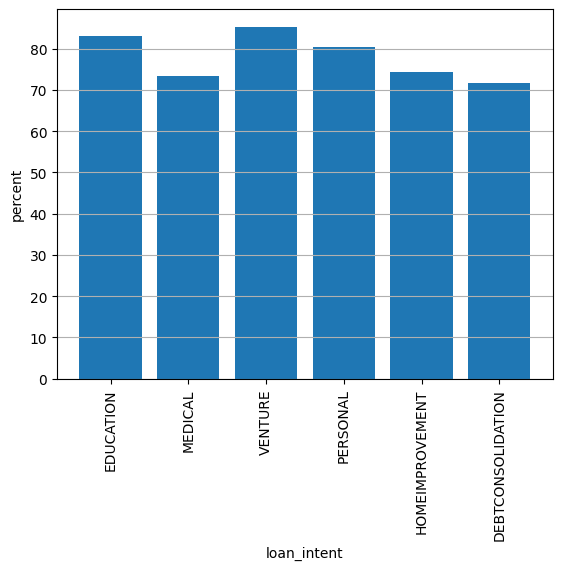

In [60]:
repayed_percent_loan_intent = []
for loan_intent in df['loan_intent'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['loan_intent'] == loan_intent)]) / len(df[df['loan_intent'] == loan_intent]) * 100
    repayed_percent_loan_intent.append(x)

print(repayed_percent_loan_intent)
print(df['loan_intent'].unique())

plt.bar(df['loan_intent'].unique(), repayed_percent_loan_intent)
plt.xlabel('loan_intent')
plt.ylabel('percent')
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.show()

Wykres przedstawia procentowy udział, osób które spłaciły kredyt (LOAN_STATUS == 0) w zależności od celu kredytu.
Jak widać kredyty były spłacane najczęściej przez osóby które wzięły kredyty na podróże (VENTURE) - 85.18%. 
Najrzadziej zaś przez osoby konsolidujące kredyt - 71.41%.

[81.91624121914705, 62.43781094527363]
['N' 'Y']


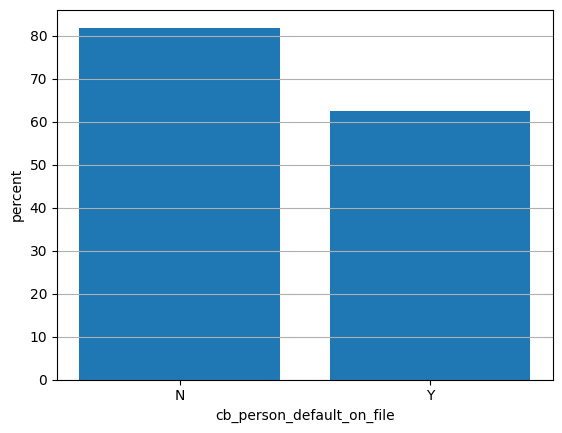

In [61]:
repayed_percent_history_default = []
for cb_person_default_on_file in df['cb_person_default_on_file'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['cb_person_default_on_file'] == cb_person_default_on_file)]) / len(df[df['cb_person_default_on_file'] == cb_person_default_on_file]) * 100
    repayed_percent_history_default.append(x)

print(repayed_percent_history_default)
print(df['cb_person_default_on_file'].unique())

plt.bar(df['cb_person_default_on_file'].unique(), repayed_percent_history_default)
plt.xlabel('cb_person_default_on_file')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

Wykres przedstawia udział osób które spłaciły kredyt w zależności od przeszłych problemów ze spłatą kredytów.

**Zamiana wartości kategorycznych na liczbowe**

In [62]:
column_values = df['person_home_ownership'].unique()
print(column_values)

['OWN' 'MORTGAGE' 'RENT' 'OTHER']


In [63]:
column_values = df['loan_intent'].unique()
print(column_values)

['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [64]:
column_values = df['loan_grade'].unique()
print(column_values)

['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [65]:
column_values = df['cb_person_default_on_file'].unique()
print(column_values)

['N' 'Y']


Zmiana wartości w kolumnach na liczbowe.

In [66]:
df = pd.get_dummies(df, prefix=['person_home_ownership'], columns=['person_home_ownership'], dtype=bool)
df = pd.get_dummies(df, prefix=['loan_intent'], columns=['loan_intent'])
df.loan_grade = df.loan_grade.map( {'A':6 , 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0} )
df.cb_person_default_on_file = df.cb_person_default_on_file.map( {'N':0 , 'Y':1} )
#df['loan_status'] = df['loan_status'].astype('category')

In [188]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_age_categorical
1,21,9600,5.0,5,1000,11.14,0,0.10,0,2,...,False,True,False,0,1,0,0,0,0,1
2,25,9600,1.0,4,5500,12.87,1,0.57,0,3,...,False,False,False,0,0,0,1,0,0,2
3,23,65500,4.0,4,35000,15.23,1,0.53,0,2,...,False,False,True,0,0,0,1,0,0,1
4,24,54400,8.0,4,35000,14.27,1,0.55,1,4,...,False,False,True,0,0,0,1,0,0,2
5,21,9900,2.0,6,2500,7.14,1,0.25,0,2,...,False,True,False,0,0,0,0,0,1,1


**Wykresy korelacji**

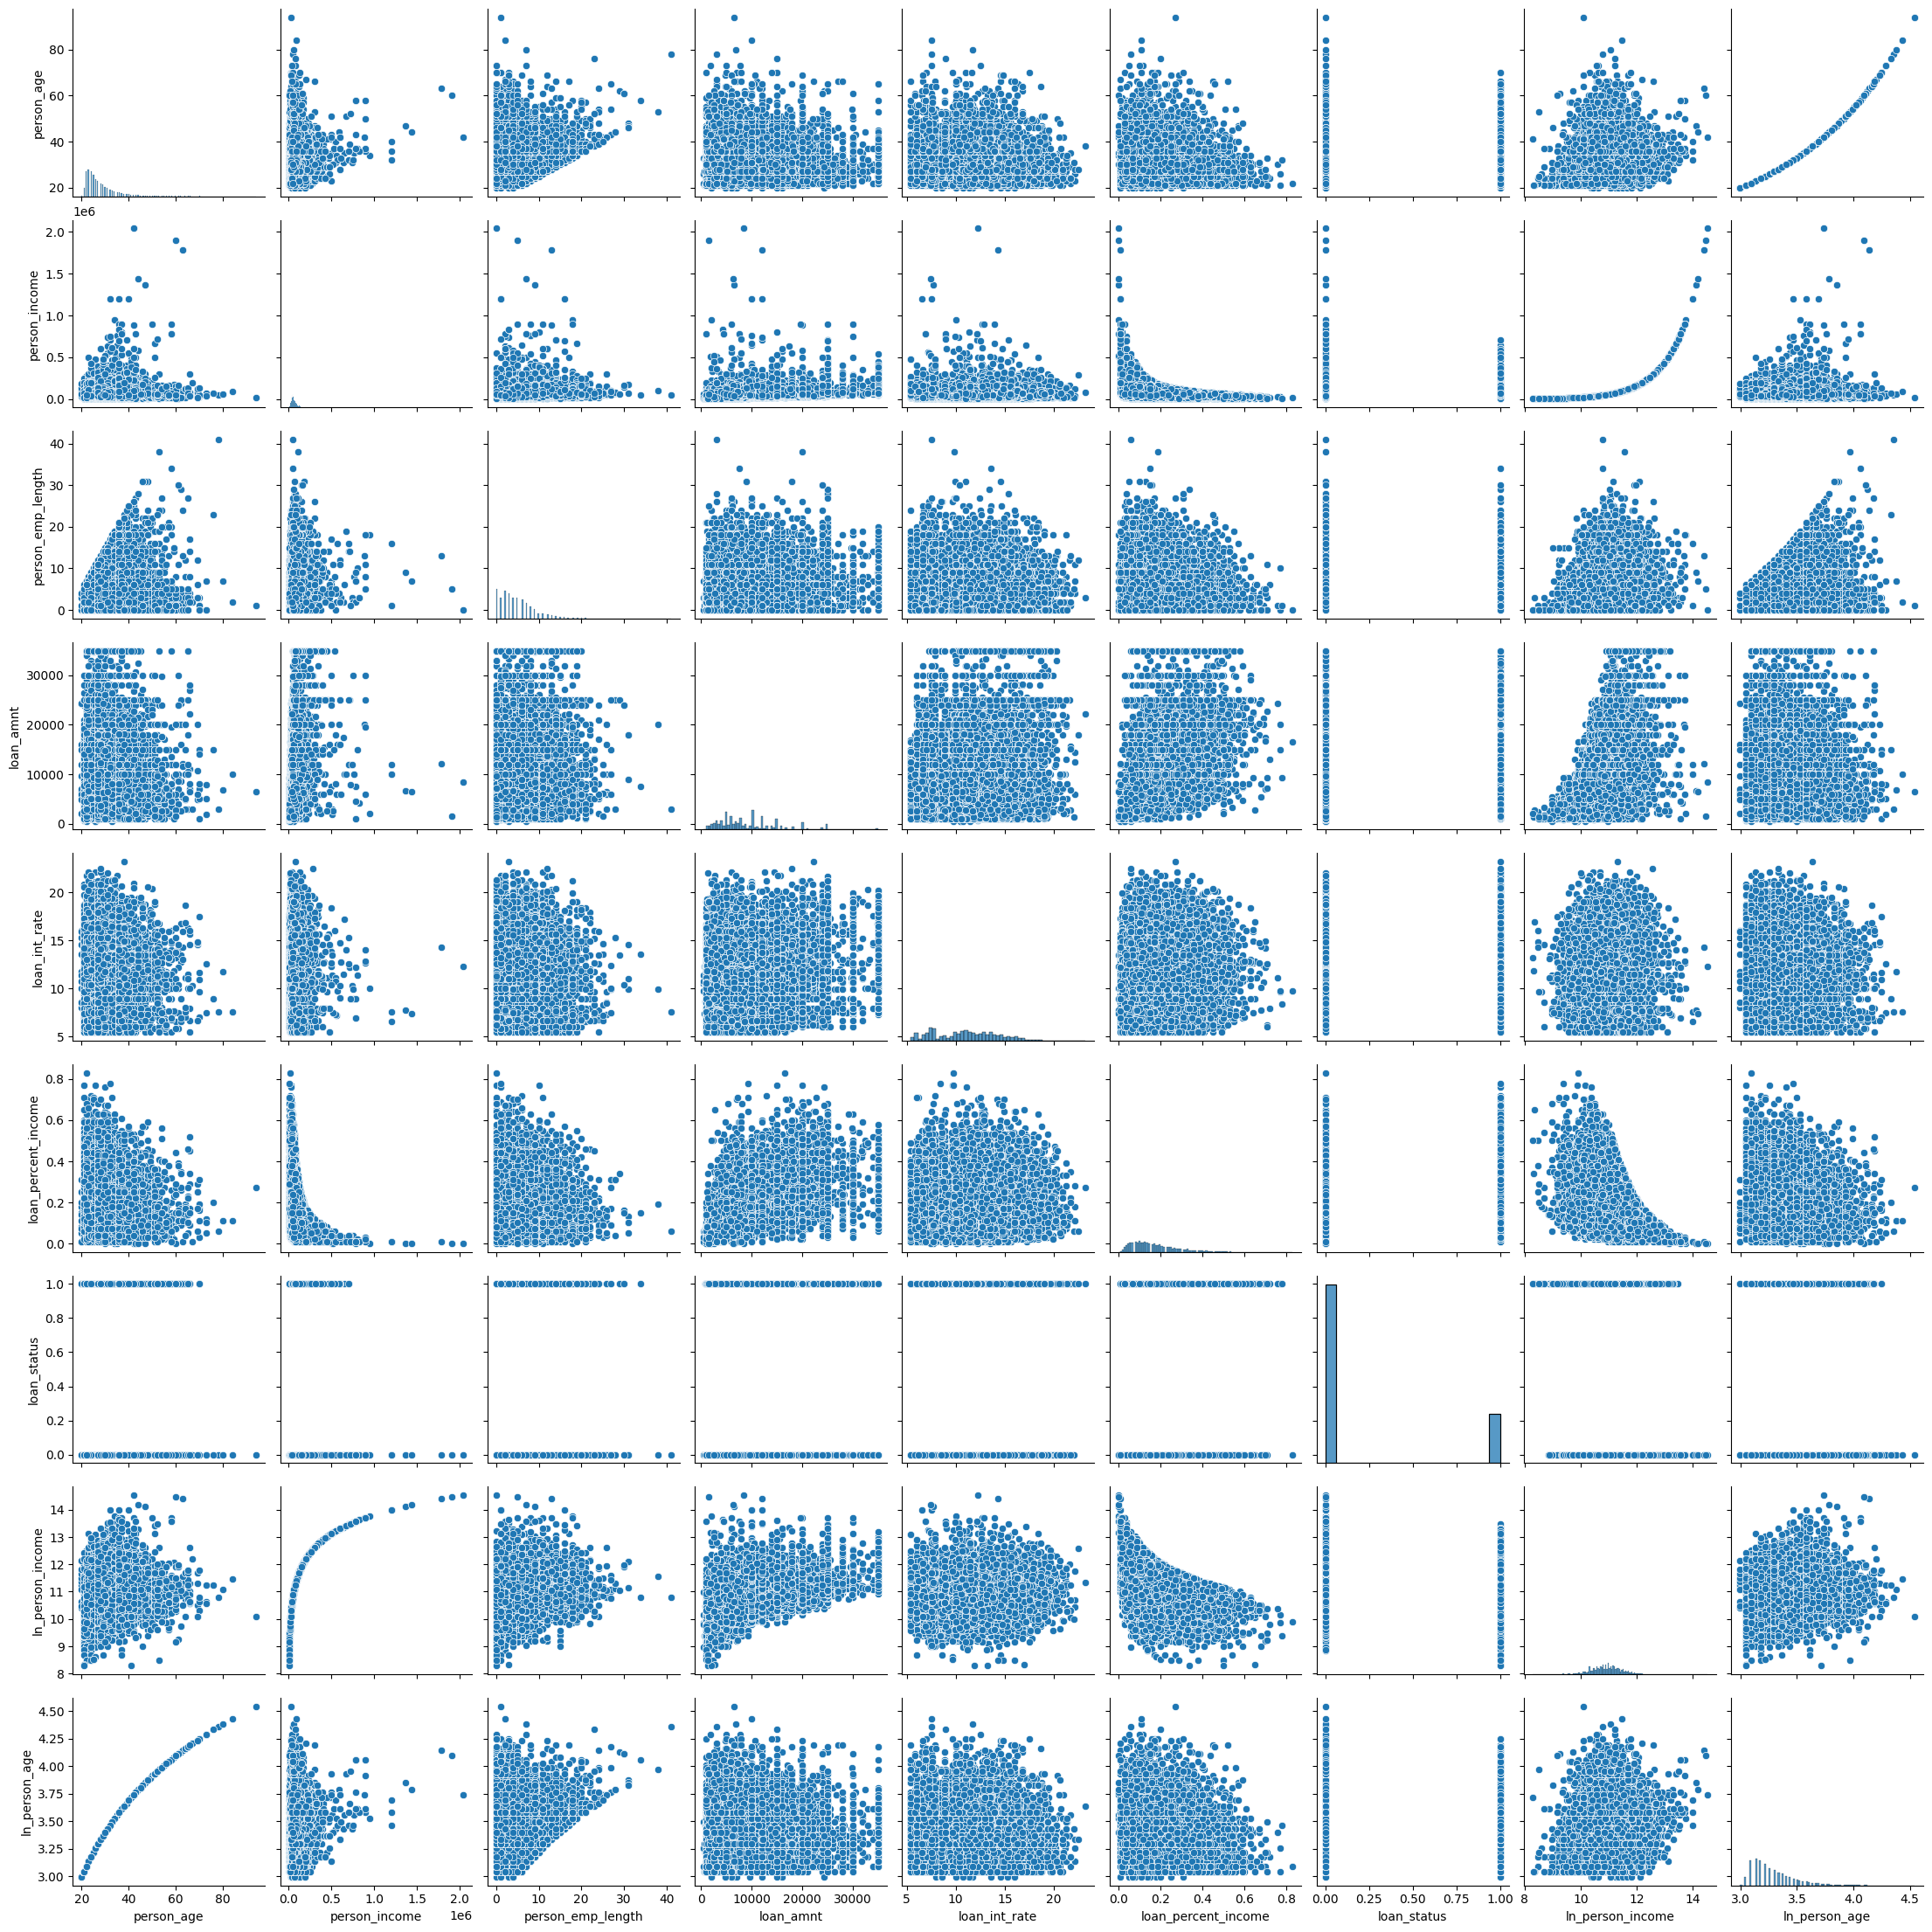

In [68]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',  'loan_percent_income', 'loan_status', 'ln_person_income', 'ln_person_age']
sns.pairplot(df[columns], kind="scatter")
plt.show()

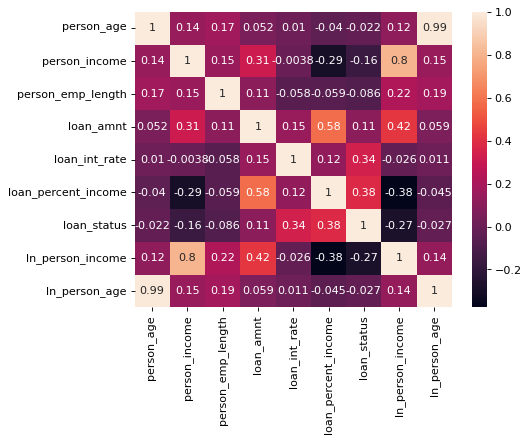

In [69]:
plt.figure(dpi = 80)
sns.heatmap(df[columns].corr(),annot = df[columns].corr())
plt.show()

Na podstawie macierzy korelacji możemy zaobserwować, że najwyższą korelację ma wielkość pożyczki oraz stosunek opłacanych rat do rocznego wynagrodzenia.

Najbardziej powiązane ze spłaceniem kredytu jest stosunek opłacanych rat do rocznego wynagrodzenia (pozytywnie), stopa oprocentowania (pozytywnie) oraz suma rocznego wynagrodzenia (negatywnie).

Zmienne person_income oraz person_age miały rozkład prawoskośny i aby go znormalizować wykorzystaliśmy logarytm naturalny. Jak widać zlogarytmowane zmienne mają wyższą korelację ze zmienną loan_status.

**Braki w danych**

Sprawdzamy które kolumny zawierają braki:

In [70]:
for col in df.columns:
    if df[col].isnull().values.any():
        print(f'Kolumna {col} zawiera braki.')

Kolumna loan_int_rate zawiera braki.


In [71]:
print("Liczba braków w kolumnie person_emp_length: ",df['person_emp_length'].isnull().sum())
print("Liczba braków w kolumnie loan_int_rate: ",df['loan_int_rate'].isnull().sum())

Liczba braków w kolumnie person_emp_length:  0
Liczba braków w kolumnie loan_int_rate:  3047


Jako że danych nie jest dużo to usunięcie wierszy ograniczy nasz model, dlatego w miejsce brakujących danych wstawimy mediany wartości w danych kolumnach. Niestety umożliwi to pojawienie się błędu statystycznego, ale na szczęście wartości tych kolumn nie posiadają zbyt dużego rozrzutu. 

In [72]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

**Hipoteza**

Zmienne mające największy wpływ na zmienną loan status to person_income, loan_int_rate, loan_percent_income. Isotna wydaje się również zmienna loan_amnt. Niewielkie znaczenie dla zmiennej loan_status mają zmienne person_emp_length i person_age.

W dalszej części projektu postaramy się stworzyć model obliczający prawdopodobieństwo spłacenia kredytu dla klienta, którego wyżej wymienione parametry są znane.

# Analiza danych

In [73]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Stworzenie kolumny z predziałami wieku**

In [191]:
# Jako, że stężenie ludzi biorących kredyty jest najwyższe w wieku lat 20-30, to podział na podgrupy 
# jest bardziej zegęszczony w tym okresie.
# 20-23, 23-26, 26-30, 30-35, 35-42, > 42
ages = [20, 23, 26, 30, 35, 42, 120] 
labels = [1, 2, 3, 4, 5, 6]   
df["person_age_categorical"] = pd.cut(df["person_age"], ages, labels = labels, include_lowest = True)
df["person_age_categorical"] = df["person_age_categorical"].astype("category")

In [207]:
# Próba przy podziale na dwie grupy
ages = [18, 26, 120] 
labels = [1, 2]   
df["person_age_categorical"] = pd.cut(df["person_age"], ages, labels = labels, include_lowest = True)
df["person_age_categorical"] = df["person_age_categorical"].astype("category")

In [138]:
# testowanie modelu na danych testowych
def test_model(model, threshold, X, y):
    predicted_values1 = model.predict(X[columns])
    predicted_class1=np.zeros(predicted_values1.shape)
    predicted_class1[predicted_values1>threshold]=1
    cm1 = confusion_matrix(y,predicted_class1)
    
    print('Confusion Matrix : \n', cm1)  
    print(cm1[0][1] + cm1[1][0])
    
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensitivity : ', sensitivity)
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Specificity : ', specificity ) 
    print(classification_report(y,predicted_class1))  

**Model na danych bez regularyzacji**

In [260]:
columns = [
       'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_age_categorical' 
        #'person_home_ownership_OTHER', 
        #'loan_intent_HOMEIMPROVEMENT',
        #'person_age',
]

X_train, X_test, y_train, y_test = train_test_split(df[columns], df['loan_status'], test_size=0.2)


train_dataset = pd.concat([X_train, y_train], axis=1)



# zmienne kategoryczne wyrzucone
#  person_home_ownership_OTHER, loan_intent_HOMEIMPROVEMENT, person_age

riskmodel_0 = smf.logit(formula = 
                      """loan_status ~ person_income  +  person_emp_length + loan_amnt + loan_int_rate + 
                      loan_percent_income + cb_person_default_on_file + cb_person_cred_hist_length + 
                      person_home_ownership_MORTGAGE +
                      person_home_ownership_OWN+person_home_ownership_RENT + loan_intent_DEBTCONSOLIDATION + 
                      loan_intent_EDUCATION + loan_intent_MEDICAL + loan_intent_PERSONAL + 
                      loan_intent_VENTURE  + person_age_categorical
                      """, 
                      data = train_dataset).fit()

riskmodel_0.summary()

Optimization terminated successfully.
         Current function value: 0.361277
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25343
Model:                          Logit   Df Residuals:                    25326
Method:                           MLE   Df Model:                           16
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3054
Time:                        16:23:31   Log-Likelihood:                -9155.9
converged:                       True   LL-Null:                       -13181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -5.9708      0.317    -18.860      0.000      -6.591      -5.350
person_home_ownership_MORTGAGE[T.True]    -0.4877      0.294     -1.657      0.097      -1.064       0.089
person_home_ownership_OWN[T.True]         -2.0423      0.310     -6.580      0.000      -2.651      -1.434
person_home_ownership_RENT[T.True]         0.2399      0.293      0.819      0.413      -0.334       0.814
person_age_categorical[T.2]               -0.1426      0.059     -2.435      0.015      -0.257      -0.028
person_income                            1.76e-06   5.14e-07      3.423      0.001    7.52e-07    2.77e-06
person_emp_length                         -0.0081      0.005     -1.584      0.113      -0.018       0.002
loan_amnt                              -8.894e-05    4.7e-06    -18.908      0.000   -9.82e-05   -7.97e-05
loan_int_rate                              0.3111      0.008     40.756      0.000       0.296       0.326
loan_percent_income                       12.5299      0.280     44.786      0.000      11.982      13.078
cb_person_default_on_file                  0.2029      0.047      4.306      0.000       0.111       0.295
cb_person_cred_hist_length                 0.0067      0.007      0.940      0.347      -0.007       0.021
loan_intent_DEBTCONSOLIDATION             -0.0446      0.068     -0.654      0.513      -0.178       0.089
loan_intent_EDUCATION                     -0.8881      0.070    -12.608      0.000      -1.026      -0.750
loan_intent_MEDICAL                       -0.1917      0.067     -2.863      0.004      -0.323      -0.060
loan_intent_PERSONAL                      -0.6717      0.071     -9.406      0.000      -0.812      -0.532
loan_intent_VENTURE                       -1.0676      0.075    -14.315      0.000      -1.214      -0.921
==========================================================================================================
"""

In [250]:
test_model(riskmodel_0, 0.4, X_test, y_test)

Confusion Matrix : 
 [[4541  434]
 [ 578  783]]
1012
Sensitivity :  0.5753122703894196
Specificity :  0.9127638190954774
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4975
           1       0.64      0.58      0.61      1361

    accuracy                           0.84      6336
   macro avg       0.77      0.74      0.75      6336
weighted avg       0.83      0.84      0.84      6336



**Model na danych z regularyzacją Lasso**

In [261]:
# zmienne kategoryczne wyrzucone
# person_home_ownership_OTHER, loan_intent_HOMEIMPROVEMENT, person_age

riskmodel_1 = smf.logit(formula = 
                      """loan_status ~ person_income  +  person_emp_length + loan_amnt + loan_int_rate + 
                      loan_percent_income + cb_person_default_on_file + cb_person_cred_hist_length + 
                      person_home_ownership_MORTGAGE + 
                      person_home_ownership_OWN+person_home_ownership_RENT + loan_intent_DEBTCONSOLIDATION + 
                      loan_intent_EDUCATION +  loan_intent_MEDICAL + loan_intent_PERSONAL + 
                      loan_intent_VENTURE + person_age_categorical""", 
                      data = train_dataset)
riskmodel_1 = riskmodel_1.fit_regularized(method='l1',  alpha=1)

riskmodel_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.36225180415471836
            Iterations: 244
            Function evaluations: 262
            Gradient evaluations: 244


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25343
Model:                          Logit   Df Residuals:                    25326
Method:                           MLE   Df Model:                           16
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3054
Time:                        16:23:36   Log-Likelihood:                -9156.0
converged:                       True   LL-Null:                       -13181.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -5.9521      0.316    -18.828      0.000      -6.572      -5.333
person_home_ownership_MORTGAGE[T.True]    -0.4884      0.294     -1.662      0.096      -1.064       0.087
person_home_ownership_OWN[T.True]         -2.0256      0.310     -6.539      0.000      -2.633      -1.418
person_home_ownership_RENT[T.True]         0.2374      0.293      0.812      0.417      -0.336       0.811
person_age_categorical[T.2]               -0.1378      0.058     -2.356      0.018      -0.252      -0.023
person_income                           1.663e-06   5.21e-07      3.193      0.001    6.42e-07    2.68e-06
person_emp_length                         -0.0083      0.005     -1.626      0.104      -0.018       0.002
loan_amnt                              -8.772e-05   4.71e-06    -18.615      0.000    -9.7e-05   -7.85e-05
loan_int_rate                              0.3099      0.008     40.685      0.000       0.295       0.325
loan_percent_income                       12.4252      0.280     44.404      0.000      11.877      12.974
cb_person_default_on_file                  0.2016      0.047      4.283      0.000       0.109       0.294
cb_person_cred_hist_length                 0.0062      0.007      0.874      0.382      -0.008       0.020
loan_intent_DEBTCONSOLIDATION             -0.0302      0.068     -0.442      0.658      -0.164       0.104
loan_intent_EDUCATION                     -0.8718      0.070    -12.388      0.000      -1.010      -0.734
loan_intent_MEDICAL                       -0.1773      0.067     -2.649      0.008      -0.309      -0.046
loan_intent_PERSONAL                      -0.6556      0.071     -9.188      0.000      -0.796      -0.516
loan_intent_VENTURE                       -1.0501      0.074    -14.097      0.000      -1.196      -0.904
==========================================================================================================
"""

In [266]:
test_model(riskmodel_1, 0.4, X_test, y_test)

Confusion Matrix : 
 [[4561  391]
 [ 629  755]]
1020
Sensitivity :  0.5455202312138728
Specificity :  0.9210420032310178
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4952
           1       0.66      0.55      0.60      1384

    accuracy                           0.84      6336
   macro avg       0.77      0.73      0.75      6336
weighted avg       0.83      0.84      0.83      6336



**Modyfikacja danych**

In [273]:
# Metoda bez regularyzacji i wraz z pokazuje, że część zmiennych nie ma znaczenia - dlatego
# je wyrzucamy. Dodaliśmy logarytm z person_income zamiast zwykłej wartości kolumny.
columns = [
       'loan_grade', 'ln_person_income',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
        #'loan_amnt',
        #'person_income',
        #'cb_person_cred_hist_length',
        #'person_emp_length',
        #'person_age_categorical' 
        #'person_home_ownership_OTHER', 
        #'loan_intent_HOMEIMPROVEMENT',
        #'person_age',
]

X_train, X_test, y_train, y_test = train_test_split(df[columns], df['loan_status'], test_size=0.2)


train_dataset = pd.concat([X_train, y_train], axis=1)



**Model z danymi znaczącymi na podstawie regularyzacji L1**

Istotne statystycznie są zmienne dla których P<=0.05.

In [274]:
riskmodel_2 = smf.logit(formula = 
                      """loan_status ~ ln_person_income  + loan_int_rate + 
                      loan_percent_income + cb_person_default_on_file + 
                      person_home_ownership_MORTGAGE + 
                      person_home_ownership_OWN + person_home_ownership_RENT + loan_intent_DEBTCONSOLIDATION + 
                      loan_intent_EDUCATION +  loan_intent_MEDICAL + loan_intent_PERSONAL + 
                      loan_intent_VENTURE """, 
                      data = train_dataset).fit()

riskmodel_2.summary()

Optimization terminated successfully.
         Current function value: 0.360341
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                25343
Model:                          Logit   Df Residuals:                    25330
Method:                           MLE   Df Model:                           12
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3083
Time:                        16:33:59   Log-Likelihood:                -9132.1
converged:                       True   LL-Null:                       -13203.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  5.2479      0.530      9.909      0.000       4.210       6.286
person_home_ownership_MORTGAGE[T.True]    -0.7568      0.281     -2.693      0.007      -1.308      -0.206
person_home_ownership_OWN[T.True]         -2.3139      0.297     -7.797      0.000      -2.896      -1.732
person_home_ownership_RENT[T.True]        -0.0412      0.280     -0.147      0.883      -0.590       0.507
ln_person_income                          -0.9921      0.041    -24.485      0.000      -1.072      -0.913
loan_int_rate                              0.3026      0.008     39.863      0.000       0.288       0.317
loan_percent_income                        7.8944      0.185     42.764      0.000       7.533       8.256
cb_person_default_on_file                  0.1843      0.048      3.878      0.000       0.091       0.277
loan_intent_DEBTCONSOLIDATION             -0.1233      0.069     -1.798      0.072      -0.258       0.011
loan_intent_EDUCATION                     -0.9192      0.070    -13.077      0.000      -1.057      -0.781
loan_intent_MEDICAL                       -0.3195      0.068     -4.720      0.000      -0.452      -0.187
loan_intent_PERSONAL                      -0.7047      0.071     -9.886      0.000      -0.844      -0.565
loan_intent_VENTURE                       -1.1449      0.074    -15.380      0.000      -1.291      -0.999
==========================================================================================================
"""

gorny lewy: poprawnie przewidzeni "non-defaulters" (splacili)

dolny prawy: poprawnie przewidzeni "defaulters" (nie splacili)

gorny prawy: blednie zakwalifikowani jako niesplacajacy (splaciliby ale nie dostali kredytu)

dolny lewy: blednie zakwalifikowani jako splacajacy (niesplacili ale dostali kredyt)

In [275]:
test_model(riskmodel_2, 0.4, X_test, y_test)

Confusion Matrix : 
 [[4561  408]
 [ 560  807]]
968
Sensitivity :  0.590343818580834
Specificity :  0.9178909237271081
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4969
           1       0.66      0.59      0.63      1367

    accuracy                           0.85      6336
   macro avg       0.78      0.75      0.76      6336
weighted avg       0.84      0.85      0.84      6336



# Wnioski

Wszystkie modele dają bardzo porównywalne wyniki końcowe, co oznacza że ani regularyzacja ani usuwanie nadmiernych zmiennych nie wpłynęło w dużym stopniu na wyniki. Jednakże wszystkie modele dają zadowalające wyniki pod kątem przyznawania kredytów - dokładność na poziomie 84%.

Zmienna threshold jest dostowana do prywatnych potrzeb banku i koniunktury gospodarczej. Im niższy threshold tym mniej niespłaconych kredytów zostanie udzielone, ale jednocześnie wzrośnie liczba nieprzyznanych kredytów osobom, które by je potencjalne spłaciły.

Zmienne mające największy wpływ na pozytywną decyzję o przyznaniu kredytu: 
- posiadanie własnego domu
- wysoki dochód

Największy negatywny wpływ:
- stosunek wielkości raty kredytu do wynagrodzenia

Nie udało nam się osiągnąć R^2 powyżej 31%.

